In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import plotly
import numpy as np
from numpy import median

In [3]:
df = pd.read_csv("desktop/merc.csv")

In [4]:
df.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [70]:
model_count = df["model"].value_counts().reset_index().rename(columns={"index":"model", "model":"sold_count"})
model_price = df.groupby("model")["price"].median().reset_index()
temp = pd.merge(model_count, model_price, on="model")

model_tax = df.groupby('model')['tax'].median().reset_index()
temp2 = pd.merge(temp, model_tax, on = "model")

model_mpg = df.groupby('model')['mpg'].median().reset_index()
temp3 = pd.merge(temp2, model_mpg, on="model")

model_engineSize = df.groupby('model')['engineSize'].median().reset_index()
model_df = pd.merge(temp3, model_engineSize, on="model")
model_df["revenue"] = model_df["sold_count"] * model_df["price"]
model_df

,model,sold_count,price,tax,mpg,engineSize,revenue
0,C Class,3747,22999.0,145.0,57.70,2.0,86177253.0
1,A Class,2561,18240.0,145.0,62.80,1.5,46712640.0
2,E Class,1953,22980.0,145.0,58.90,2.0,44879940.0
3,GLC Class,960,30999.0,145.0,47.90,2.1,29759040.0
4,GLA Class,847,19849.0,145.0,56.50,2.1,16812103.0
5,B Class,591,20900.0,145.0,55.40,1.6,12351900.0
6,CL Class,511,19760.0,145.0,51.40,2.1,10097360.0
7,GLE Class,461,37871.0,145.0,37.70,3.0,17458531.0
8,SL CLASS,260,27353.5,145.0,47.10,2.1,7111910.0
9,CLS Class,237,21998.0,145.0,49.60,2.9,5213526.0


Text(0.5, 1.0, 'Sold Count of Each Model and Respective Revenue')

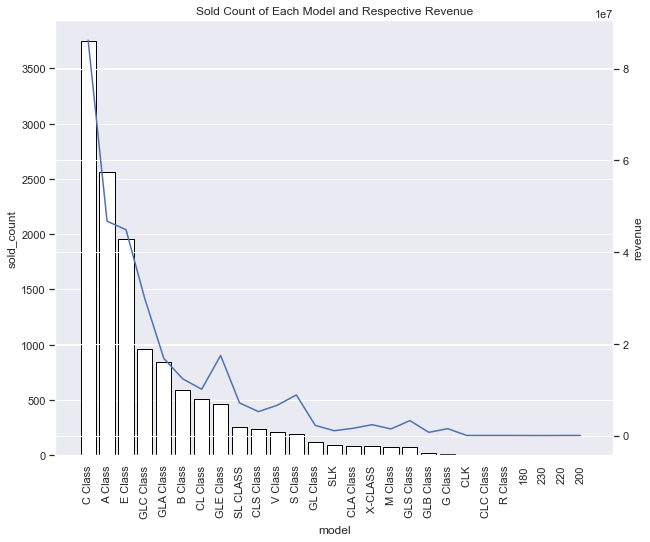

In [81]:
plt.figure(figsize = (10, 8))
ax1 = sns.barplot(data = model_df, x = "model", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(model_df["model"], rotation = 90)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = model_df, x = "model", y = "revenue")

plt.title("Sold Count of Each Model and Respective Revenue")

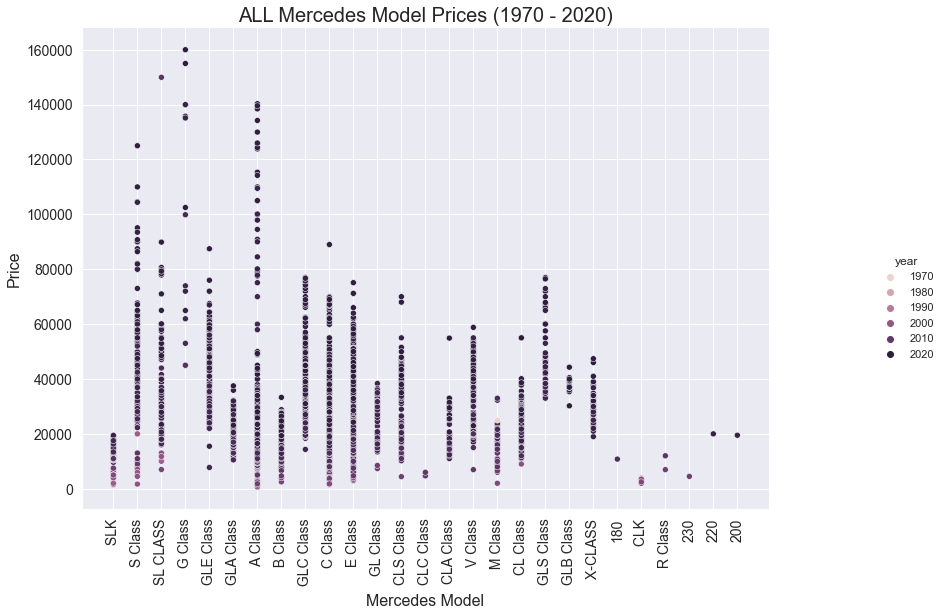

In [25]:
sns.set(style="darkgrid")
sns.relplot(data = df, x = "model", y = "price", hue = "year")

plt.title("ALL Mercedes Model Prices (1970 - 2020)", fontsize=20)
plt.xlabel("Mercedes Model", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize = 14)

plt.gcf().set_size_inches(15, 8)

Text(0.5, 1.0, 'Transimission Type vs Engine Size')

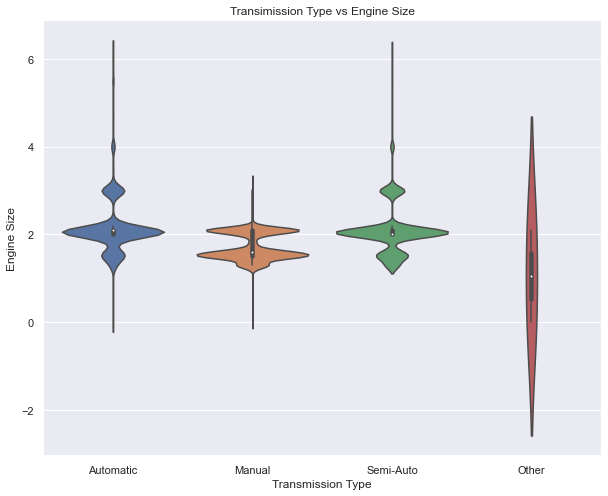

In [34]:
plt.figure(figsize = (10, 8))
sns.violinplot(x='transmission', y ="engineSize", data = df)
plt.xlabel("Transmission Type")
plt.ylabel("Engine Size")
plt.title("Transimission Type vs Engine Size")

Text(0.5, 1.0, 'Fuel Type and Respective MPG')

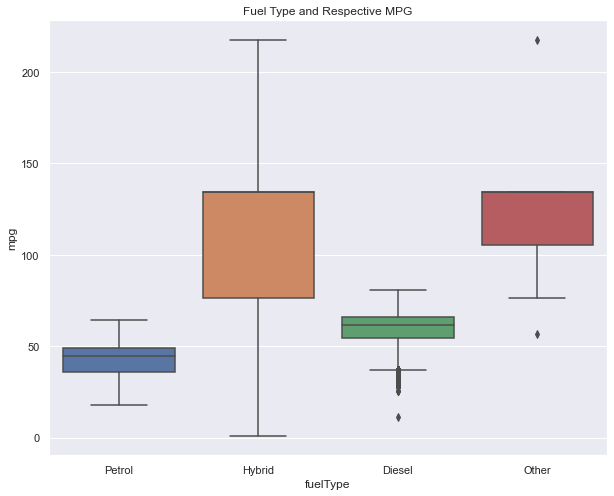

In [35]:
plt.figure(figsize = (10, 8))
sns.boxplot(x="fuelType", y="mpg", data = df)
plt.title("Fuel Type and Respective MPG")

Text(0.5, 1.0, 'Number of Models Sold by Fuel Type')

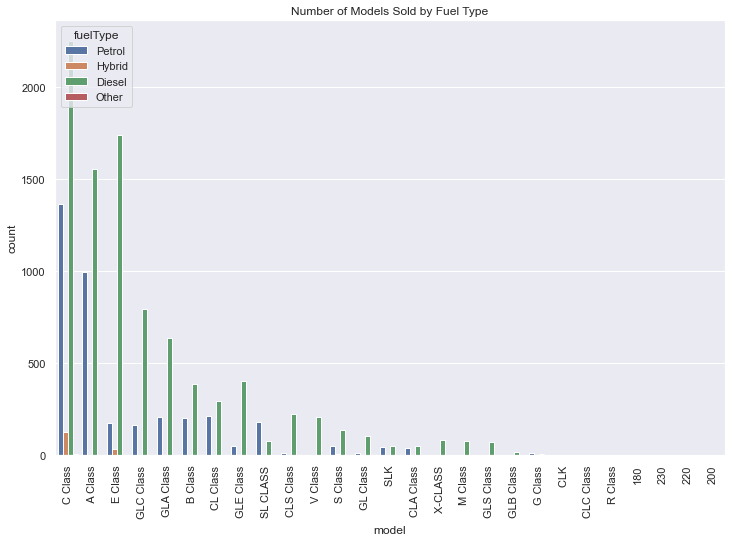

In [87]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = "model", hue = "fuelType", order = df['model'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Number of Models Sold by Fuel Type")

Text(0.5, 1.0, 'Miles per Gallen Data of each Model')

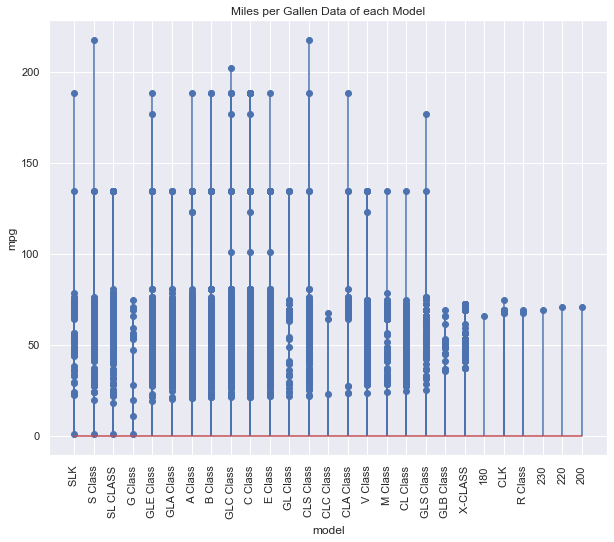

In [68]:
plt.figure(figsize = (10, 8))
plt.stem(df["model"], df["mpg"].sort_values())
plt.xticks(rotation = 90)
plt.xlabel("model")
plt.ylabel("mpg")
plt.title("Miles per Gallen Data of each Model")

Text(0.5, 1.0, 'Manufacture Year vs Respective Price')

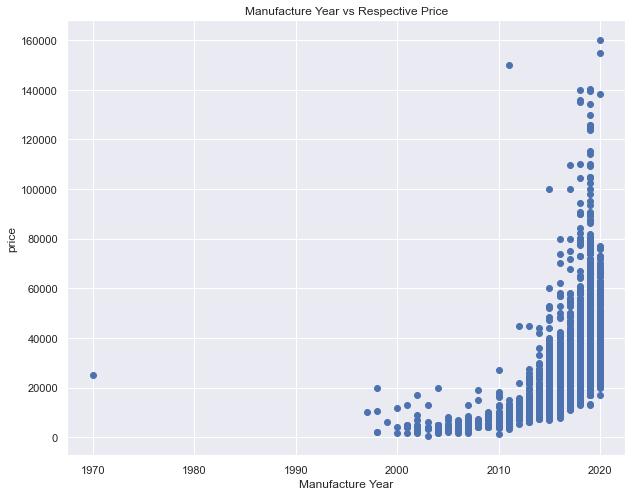

In [29]:
plt.figure(figsize = (10, 8))
plt.scatter(x = df.year, y = df.price)
plt.xlabel("Manufacture Year")
plt.ylabel("price")
plt.title("Manufacture Year vs Respective Price")

Text(0.5, 1.0, 'Mercedes Price Range vs Sold Count')

<Figure size 864x576 with 0 Axes>

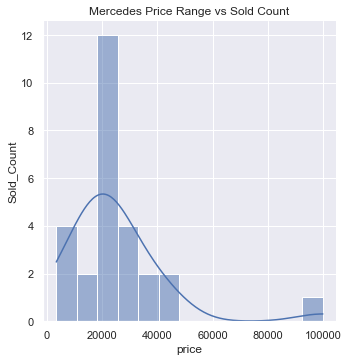

In [61]:
plt.figure(figsize = (12, 8))
sns.displot(data = model_df, x = "price", kde = True)
plt.ylabel("Sold_Count")
plt.title("Mercedes Price Range vs Sold Count")

Text(0, 0.5, 'Average Taxes')

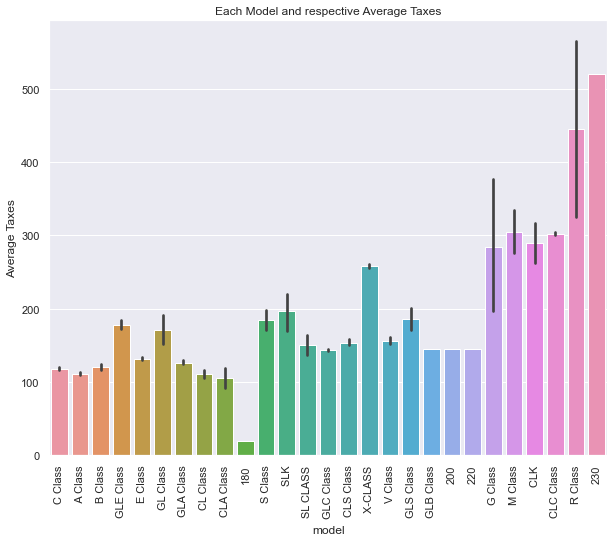

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data= df.sort_values('tax'), x = "model", y = "tax")

plt.xticks(rotation = 90)
plt.title("Each Model and respective Average Taxes")
plt.ylabel("Average Taxes")

In [10]:
top_5_models = model_df['model'].tolist()[0:5]
top_5_models

[' C Class', ' A Class', ' E Class', ' GLC Class', ' GLA Class']

Text(0.5, 1.0, 'Percentage of Each Transmission Type')

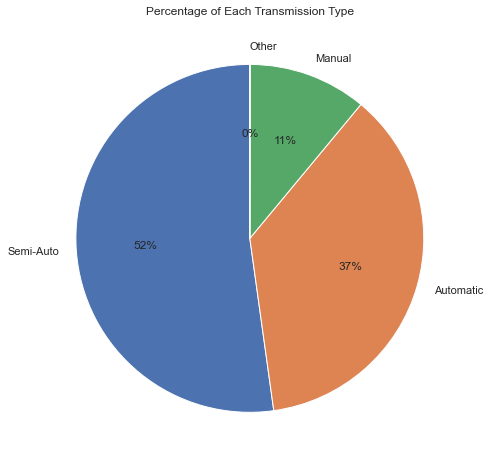

In [62]:
plt.figure(figsize=(10, 8))
transmission_count = df["transmission"].value_counts().reset_index().rename(columns={"index" : "transmission_type", "transmission": "count"})
plt.pie(transmission_count["count"].tolist(), labels=transmission_count["transmission_type"].tolist(), autopct='%.0f%%', startangle = 90)
plt.title("Percentage of Each Transmission Type")